In [1]:
from qiskit import *
from utils import *
import numpy as np

In [2]:
def make_circled_neighbour_indices(n):
    return np.append(make_neighbour_indices(n), [[n - 1, 0]], axis=0)

In [3]:
def X_gate():
    mat = np.array([
        [0, -1, 0, 0],
        [1, 0, 0, 0],
        [0, 0, -1, 0],
        [0, 0, 0, 1]
    ])
    x_gate = qiskit.extensions.UnitaryGate(mat, 'X')
    return x_gate

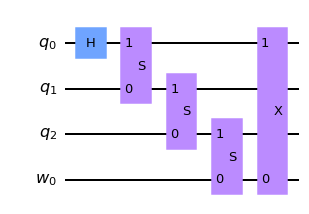

In [6]:
circ = linear_circuit(3)
w = QuantumRegister(1, 'w')
circ.add_register(w)
circ.append(S_gate(), [w[0], circ.qubits[-2]])
circ.append(X_gate(), [w[0], circ.qubits[0]])

circ.draw('mpl')

In [22]:
backend = Aer.get_backend('statevector_simulator')
job = execute(circ, backend)
result = job.result()

In [21]:
filtered_results = {key: value for (key, value) in result.get_counts().items() if key[0] == '1'}
summa = sum(filtered_results.values())
normalized_filtered = {key[1:]: value/summa for (key, value) in filtered_results.items()}
final_probs = result.Result.from_dict(normalized_filtered)
qiskit.visualization.plot_histogram(result.get_counts(circ))

{'000': 0.4739574969137592,
 '001': 0.008680834362080257,
 '010': 0.008680834362080257,
 '011': 0.008680834362080257,
 '100': 0.008680834362080257,
 '101': 0.008680834362080257,
 '110': 0.008680834362080257,
 '111': 0.4739574969137592}

In [8]:
get_probs_distribution(3, make_circled_neighbour_indices(3))

,s,Pr[s]
0,"[-1, -1, -1]",0.473957
1,"[-1, -1, 1]",0.008681
2,"[-1, 1, -1]",0.008681
3,"[-1, 1, 1]",0.008681
4,"[1, -1, -1]",0.008681
5,"[1, -1, 1]",0.008681
6,"[1, 1, -1]",0.008681
7,"[1, 1, 1]",0.473957
